In [ ]:
!pip install ceml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.0/91.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 479.7/479.7 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 81.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 70.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 39

In [ ]:
import numpy as np
import pandas as pd
from math import *
from datetime import datetime
from operator import itemgetter
from zipfile import ZipFile
from io import BytesIO
import pickle
from urllib.request import urlopen

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from numpy import inf
from scipy.stats import kurtosis, skew

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import average_precision_score, precision_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier as RawRandomForestClassifier


import warnings
warnings.filterwarnings('ignore')


In [ ]:
#loading dataset
df = pd.read_csv('/content/Absenteeism_at_work.csv', sep=',')

In [ ]:
df.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


In [ ]:
# Combining Pet and Son as dependent
df['dependent'] = (df['Pet'] + df['Son'])
df.head(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,dependent
0,11,26,7,3,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,4,3
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,0,0,98,178,31,0,1
2,3,23,7,4,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,0
3,7,7,7,5,1,279,5,14,39,239.554,...,1,2,1,1,0,68,168,24,4,2
4,11,23,7,5,1,289,36,13,33,239.554,...,1,2,1,0,1,90,172,30,2,3
5,3,23,7,6,1,179,51,18,38,239.554,...,1,0,1,0,0,89,170,31,2,0
6,10,22,7,6,1,361,52,3,28,239.554,...,1,1,1,0,4,80,172,27,8,5
7,20,23,7,6,1,260,50,11,36,239.554,...,1,4,1,0,0,65,168,23,4,4
8,14,19,7,2,1,155,12,14,34,239.554,...,1,2,1,0,0,95,196,25,40,2
9,1,22,7,2,1,235,11,14,37,239.554,...,3,1,0,0,1,88,172,29,8,2


In [ ]:
# Recategorizing Reasons for Absence to decrease the number of categories
disease_category = {1:[1,2,3,4], 2: [5,6], 3:[7,8], 4:[9,10,11], 5:[12,13,14], 6:[15,16,17], 7:[18,19,0,21], 8:[22,23,24,25,26,27,28]}

# Define a function to map disease codes to categories
def map_disease_category(disease_code):
    for category, codes in disease_category.items():
        if disease_code in codes:
            return category
    return None

# Apply the mapping function to the disease codes column and create a new column for categories
df['Disease_Category'] = df['Reason for absence'].map(map_disease_category)

In [ ]:
# Modifying Education Colummn
df['GraduateOrHigher'] = df['Education'].apply(lambda x: 1 if x > 1 else 0)

In [ ]:
# Modifying Absenteeism column
median_value = df['Absenteeism time in hours'].median()

# Assign 1 if greater than median, else 0
df['HighAbsenteeism'] = df['Absenteeism time in hours'].apply(lambda x: 1 if x > median_value else 0)

In [ ]:
df.drop(['Pet', 'Son', 'Height', 'Weight', 'ID','Absenteeism time in hours', 'Education', 'Reason for absence'], axis = 1, inplace = True)

In [ ]:
df.head(10)

,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Social drinker,Social smoker,Body mass index,dependent,Disease_Category,GraduateOrHigher,HighAbsenteeism
0,7,3,1,289,36,13,33,239.554,97,0,1,0,30,3,8,0,1
1,7,3,1,118,13,18,50,239.554,97,1,1,0,31,1,7,0,0
2,7,4,1,179,51,18,38,239.554,97,0,1,0,31,0,8,0,0
3,7,5,1,279,5,14,39,239.554,97,0,1,1,24,2,3,0,1
4,7,5,1,289,36,13,33,239.554,97,0,1,0,30,3,8,0,0
5,7,6,1,179,51,18,38,239.554,97,0,1,0,31,0,8,0,0
6,7,6,1,361,52,3,28,239.554,97,0,1,0,27,5,8,0,1
7,7,6,1,260,50,11,36,239.554,97,0,1,0,23,4,8,0,1
8,7,2,1,155,12,14,34,239.554,97,0,1,0,25,2,7,0,1
9,7,2,1,235,11,14,37,239.554,97,0,0,0,29,2,8,1,1


In [ ]:
df.shape

(740, 17)

In [ ]:
df = pd.get_dummies(df,columns=['Seasons','Disease_Category', 'GraduateOrHigher', 'Day of the week', 'Month of absence'],drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df.head(10)

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Social drinker,Social smoker,Body mass index,...,Month of absence_3,Month of absence_4,Month of absence_5,Month of absence_6,Month of absence_7,Month of absence_8,Month of absence_9,Month of absence_10,Month of absence_11,Month of absence_12
0,289,36,13,33,239.554,97,0,1,0,30,...,0,0,0,0,1,0,0,0,0,0
1,118,13,18,50,239.554,97,1,1,0,31,...,0,0,0,0,1,0,0,0,0,0
2,179,51,18,38,239.554,97,0,1,0,31,...,0,0,0,0,1,0,0,0,0,0
3,279,5,14,39,239.554,97,0,1,1,24,...,0,0,0,0,1,0,0,0,0,0
4,289,36,13,33,239.554,97,0,1,0,30,...,0,0,0,0,1,0,0,0,0,0
5,179,51,18,38,239.554,97,0,1,0,31,...,0,0,0,0,1,0,0,0,0,0
6,361,52,3,28,239.554,97,0,1,0,27,...,0,0,0,0,1,0,0,0,0,0
7,260,50,11,36,239.554,97,0,1,0,23,...,0,0,0,0,1,0,0,0,0,0
8,155,12,14,34,239.554,97,0,1,0,25,...,0,0,0,0,1,0,0,0,0,0
9,235,11,14,37,239.554,97,0,0,0,29,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
df.columns

Index(['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Social drinker', 'Social smoker',
       'Body mass index', 'dependent', 'HighAbsenteeism', 'Seasons_2',
       'Seasons_3', 'Seasons_4', 'Disease_Category_2', 'Disease_Category_3',
       'Disease_Category_4', 'Disease_Category_5', 'Disease_Category_6',
       'Disease_Category_7', 'Disease_Category_8', 'GraduateOrHigher_1',
       'Day of the week_3', 'Day of the week_4', 'Day of the week_5',
       'Day of the week_6', 'Month of absence_1', 'Month of absence_2',
       'Month of absence_3', 'Month of absence_4', 'Month of absence_5',
       'Month of absence_6', 'Month of absence_7', 'Month of absence_8',
       'Month of absence_9', 'Month of absence_10', 'Month of absence_11',
       'Month of absence_12'],
      dtype='object')

In [ ]:
X = df.drop(columns = ['HighAbsenteeism'])
y = df['HighAbsenteeism']

In [ ]:
X.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Social drinker,Social smoker,Body mass index,...,Month of absence_3,Month of absence_4,Month of absence_5,Month of absence_6,Month of absence_7,Month of absence_8,Month of absence_9,Month of absence_10,Month of absence_11,Month of absence_12
0,289,36,13,33,239.554,97,0,1,0,30,...,0,0,0,0,1,0,0,0,0,0
1,118,13,18,50,239.554,97,1,1,0,31,...,0,0,0,0,1,0,0,0,0,0
2,179,51,18,38,239.554,97,0,1,0,31,...,0,0,0,0,1,0,0,0,0,0
3,279,5,14,39,239.554,97,0,1,1,24,...,0,0,0,0,1,0,0,0,0,0
4,289,36,13,33,239.554,97,0,1,0,30,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
X.shape

(740, 38)

# 1. Raw Data - Raw Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

Decision Tree on Raw Data

In [ ]:
# Initialize the decision tree classifier with class weight balancing
dtree_raw = DecisionTreeClassifier(random_state=42)


# Train the model on the training data
dtree_raw.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dtree_raw.predict(X_test)

# Evaluate the model
rdrm_accuracy = accuracy_score(y_test, y_pred)
rdrm_recall = recall_score(y_test, y_pred)
rdrm_f1 = f1_score(y_test, y_pred)
rdrm_conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", rdrm_accuracy)
print("Recall:", rdrm_recall)
print("F1 Score:", rdrm_f1)
print("Confusion Matrix:")
print(rdrm_conf_matrix)

Accuracy: 0.722972972972973
Recall: 0.7313432835820896
F1 Score: 0.7050359712230216
Confusion Matrix:
[[58 23]
 [18 49]]


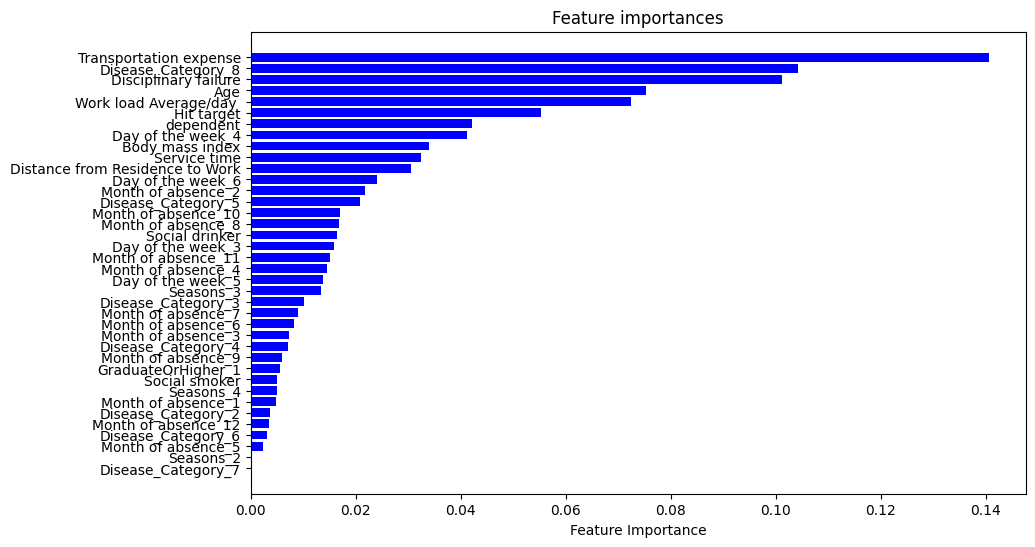

In [ ]:
# Extract feature importances
importances = dtree_raw.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Plot the feature importances horizontally with blue color above
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
       color="blue", align="center")
plt.yticks(range(X_train.shape[1]), feature_names[indices])
plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to keep blue above
plt.show()

Random forest on Raw data

In [ ]:
#Random Forest

rdrm_rf = RawRandomForestClassifier(random_state=42)

# 4. Train Model
rdrm_rf.fit(X_train, y_train)

# 5. Make Predictions
y_pred = rdrm_rf.predict(X_test)

# Evaluate the model
rdrm_accuracy = accuracy_score(y_test, y_pred)
rdrm_recall = recall_score(y_test, y_pred)
rdrm_precision = precision_score(y_test, y_pred)  # Calculate precision
rdrm_f1 = f1_score(y_test, y_pred)
rdrm_conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", rdrm_accuracy)
print("Recall:", rdrm_recall)
print("Precision:", rdrm_precision)  # Print precision
print("F1 Score:", rdrm_f1)

Accuracy: 0.7567567567567568
Recall: 0.8059701492537313
Precision: 0.7012987012987013
F1 Score: 0.75


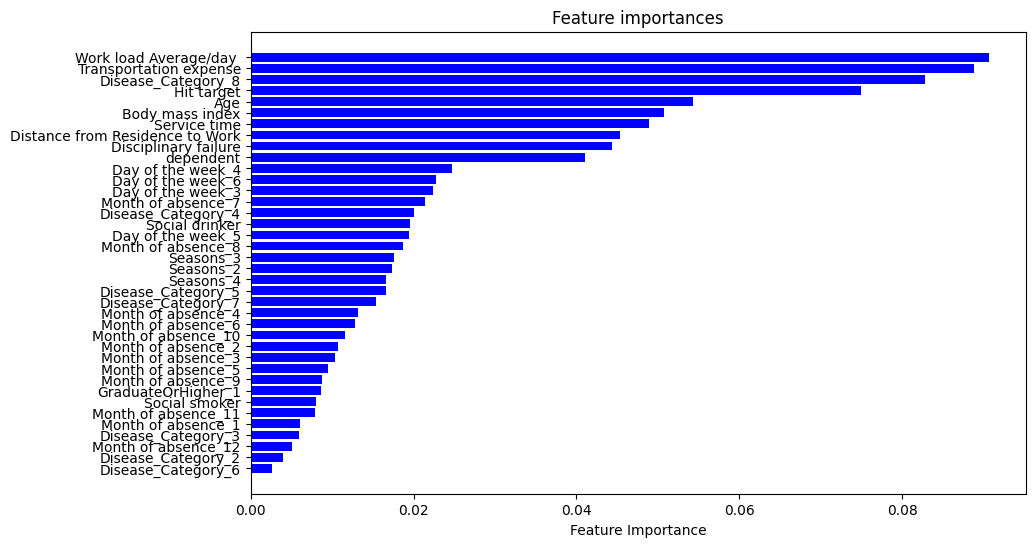

In [ ]:
# Extract feature importances
importances = rdrm_rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Plot the feature importances horizontally with blue color above
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
       color="blue", align="center")
plt.yticks(range(X_train.shape[1]), feature_names[indices])
plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to keep blue above
plt.show()

In [ ]:
# Create a DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Reset the index
feature_importance_df = feature_importance_df.reset_index(drop=True)
feature_importance_df.head()

,Feature,Importance
0,Work load Average/day,0.090615
1,Transportation expense,0.088855
2,Disease_Category_8,0.082778
3,Hit target,0.074883
4,Age,0.054300


# 2. DP data - Raw Model

In [ ]:
X.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Social drinker,Social smoker,Body mass index,...,Month of absence_3,Month of absence_4,Month of absence_5,Month of absence_6,Month of absence_7,Month of absence_8,Month of absence_9,Month of absence_10,Month of absence_11,Month of absence_12
0,289,36,13,33,239.554,97,0,1,0,30,...,0,0,0,0,1,0,0,0,0,0
1,118,13,18,50,239.554,97,1,1,0,31,...,0,0,0,0,1,0,0,0,0,0
2,179,51,18,38,239.554,97,0,1,0,31,...,0,0,0,0,1,0,0,0,0,0
3,279,5,14,39,239.554,97,0,1,1,24,...,0,0,0,0,1,0,0,0,0,0
4,289,36,13,33,239.554,97,0,1,0,30,...,0,0,0,0,1,0,0,0,0,0


#### Creating a seperate dataset for DP data

In [ ]:
import copy

X_dp = copy.deepcopy(X)

In [ ]:
X_dp.shape

(740, 38)

#### Applying DP on the data

In [ ]:
# Appying DP on Age

senstivity = 1
epsilon = 0.6
dp_age=[]

original = X_dp['Age']

for i in range(0, X_dp.shape[0]):
        value=original[i] +  np.random.laplace(loc=0, scale=senstivity/epsilon)
        value = round(value)
        dp_age.append(value)


X_dp['Age'] = dp_age

In [ ]:
# Appying DP on BMI

senstivity = 1
epsilon = 0.8
dp_BMI=[]

original = X_dp['Body mass index']

for i in range(0, X_dp.shape[0]):
        value=original[i] +  np.random.laplace(loc=0, scale=senstivity/epsilon)
        value = round(value)
        dp_BMI.append(value)


X_dp['Body mass index'] = dp_BMI

In [ ]:
X_dp.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Social drinker,Social smoker,Body mass index,...,Month of absence_3,Month of absence_4,Month of absence_5,Month of absence_6,Month of absence_7,Month of absence_8,Month of absence_9,Month of absence_10,Month of absence_11,Month of absence_12
0,289,36,13,33,239.554,97,0,1,0,29,...,0,0,0,0,1,0,0,0,0,0
1,118,13,18,51,239.554,97,1,1,0,30,...,0,0,0,0,1,0,0,0,0,0
2,179,51,18,36,239.554,97,0,1,0,32,...,0,0,0,0,1,0,0,0,0,0
3,279,5,14,37,239.554,97,0,1,1,25,...,0,0,0,0,1,0,0,0,0,0
4,289,36,13,35,239.554,97,0,1,0,30,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
#Split data into train test
X_train, X_test,y_train, y_test=train_test_split(X_dp, y, test_size=0.2,random_state=42)

Random Forest on DP data

In [ ]:
# Random Forest
dprm_rf = RawRandomForestClassifier(random_state=42)

# Train Model
dprm_rf.fit(X_train, y_train)

# Make Predictions
y_pred = dprm_rf.predict(X_test)

# Evaluate the model
dprm_accuracy = accuracy_score(y_test, y_pred)
dprm_recall = recall_score(y_test, y_pred)
dprm_precision = precision_score(y_test, y_pred)
dprm_f1 = f1_score(y_test, y_pred)
dprm_conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", dprm_accuracy)
print("Recall:", dprm_recall)
print("Precision:", dprm_precision)
print("F1 Score:", dprm_f1)
print("Confusion Matrix:")
print(dprm_conf_matrix)

Accuracy: 0.7635135135135135
Recall: 0.7910447761194029
Precision: 0.7162162162162162
F1 Score: 0.7517730496453902
Confusion Matrix:
[[60 21]
 [14 53]]


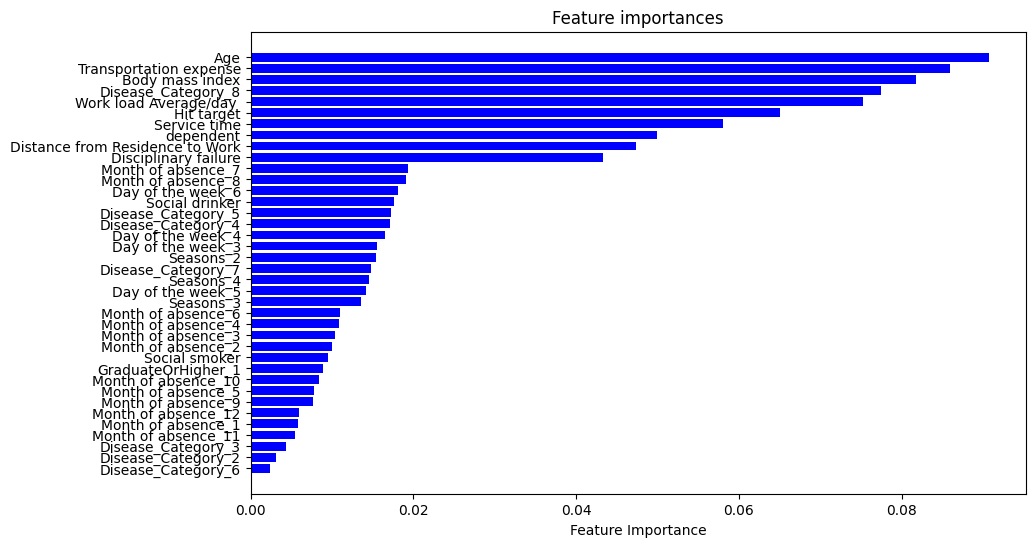

In [ ]:
# Extract feature importances
importances = dprm_rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get feature names
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Plot the feature importances horizontally with blue color above
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
       color="blue", align="center")
plt.yticks(range(X_train.shape[1]), feature_names[indices])
plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to keep blue above
plt.show()

# 3. Raw Data - DP Model

In [ ]:
#Split Raw data into train test
X_train, X_test,y_train, y_test=train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
!pip install diffprivlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 4.6 MB/s eta 0:00:00


Raw data and DP Model (random Forest)

In [ ]:
from diffprivlib.models import RandomForestClassifier as DpRandomForestClassifier

rddp_rf = DpRandomForestClassifier(n_estimators=100, random_state=30, epsilon=1, n_jobs=1, verbose=0, accountant=None, feature_domains=None)

rddp_rf.fit(X_train, y_train)

rddp_prediction_test = rddp_rf.predict(X_test)
rddp_accuracy = (accuracy_score(y_test, rddp_prediction_test))
rddp_f1 = (f1_score(y_test, rddp_prediction_test))
rddp_recall = (recall_score(y_test, rddp_prediction_test))
rddp_precision = (precision_score(y_test, rddp_prediction_test))

print('Accuracy:', rddp_accuracy)
print('F1_score:', rddp_f1)
print('recall:', rddp_recall)
print('precision:', rddp_precision)

/usr/local/lib/python3.10/dist-packages/diffprivlib/models/forest.py:190: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "
/usr/local/lib/python3.10/dist-packages/diffprivlib/models/forest.py:209: PrivacyLeakWarning: Classes have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify the prediction classes for model.
  warnings.warn("Classes have not been specified and will be calculated on the data provided. This will "


Accuracy: 0.5743243243243243
F1_score: 0.25882352941176473
recall: 0.16417910447761194
precision: 0.6111111111111112


# 4. DP data - DP model

In [ ]:
#Split Raw data into train test
X_train, X_test,y_train, y_test=train_test_split(X_dp, y, test_size=0.2,random_state=42)

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from diffprivlib.models import RandomForestClassifier as DpRandomForestClassifier

Accofdp=[]
f1 =[]
recall =[]
precision =[]
pred_prob=[]
for i in np.arange(0.1, 4.0, 0.1):
    dpdm_rf = DpRandomForestClassifier(n_estimators=100,random_state=30, epsilon=i, n_jobs=-1, verbose=0, accountant=None, feature_domains=None)
    dpdm_rf.fit(X_train,y_train)
    prediction_test=dpdm_rf.predict(X_test)
    Accofdp.append(accuracy_score(y_test, prediction_test))
    f1.append(f1_score(y_test, prediction_test, average ='binary'))
    recall.append(recall_score(y_test, prediction_test, average ='binary'))
    precision.append(precision_score(y_test, prediction_test, average ='binary'))
    pred_prob.append(dpdm_rf.predict_proba(X_test)[:,1])

In [ ]:
accdp_mean= np.average(Accofdp)
f1_mean=np.average(f1)
precision_mean=np.average(precision)
recall_mean=np.average(recall)

print("max accuracy of private model with private data", max(Accofdp))
print("min accuracy of private model with private data", min(Accofdp))
print("Accuracy of non private model with private data", dprm_accuracy)

max accuracy of private model with private data 0.6148648648648649
min accuracy of private model with private data 0.46621621621621623
Accuracy of non private model with private data 0.7635135135135135


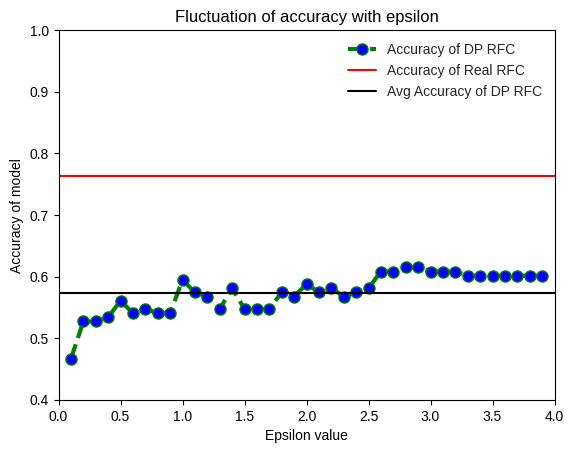

In [ ]:
import matplotlib.pyplot as plt
x= np.arange(0.1,4.0, 0.1)
plt.plot(x, Accofdp, color ='green',linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=8, label = 'Accuracy of DP RFC')
plt.style.use('seaborn-whitegrid')

plt.axhline(y=dprm_accuracy, color ='red', label= 'Accuracy of Real RFC')
plt.axhline(y = accdp_mean, color ='black', label ='Avg Accuracy of DP RFC')
plt.ylim(0.4, 1.0)
plt.xlim(0,4)
plt.xlabel('Epsilon value')
plt.ylabel('Accuracy of model')
plt.title('Fluctuation of accuracy with epsilon')
plt.legend()
plt.show()

In [ ]:
print("max f1 score of private model with private data", max(f1))
print("min f1 score of private model with private data", min(f1))
print("F1 score of non private model with private data", dprm_f1)

max f1 score of private model with private data 0.32941176470588235
min f1 score of private model with private data 0.0
F1 score of non private model with private data 0.7517730496453902


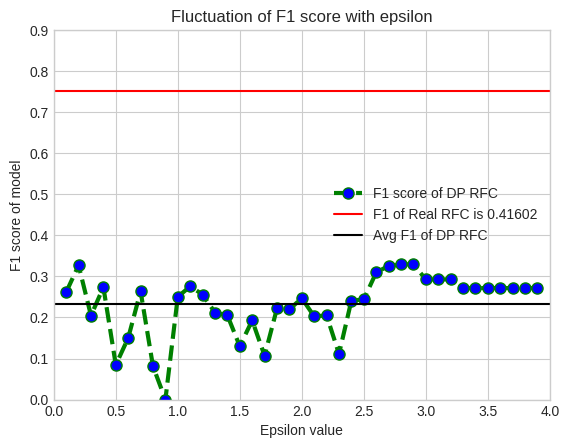

In [ ]:
x= np.arange(0.1,4.0, 0.1)
plt.plot(x, f1, color ='green',linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=8, label = 'F1 score of DP RFC')
plt.style.use('seaborn-whitegrid')

plt.axhline(y=dprm_f1, color ='red', label= 'F1 of Real RFC is 0.41602')
plt.axhline(y =f1_mean, color ='black', label ='Avg F1 of DP RFC')
plt.ylim(0, 0.9)
plt.xlim(0,4)
plt.xlabel('Epsilon value')
plt.ylabel('F1 score of model')
plt.title('Fluctuation of F1 score with epsilon')
plt.legend()
plt.show()

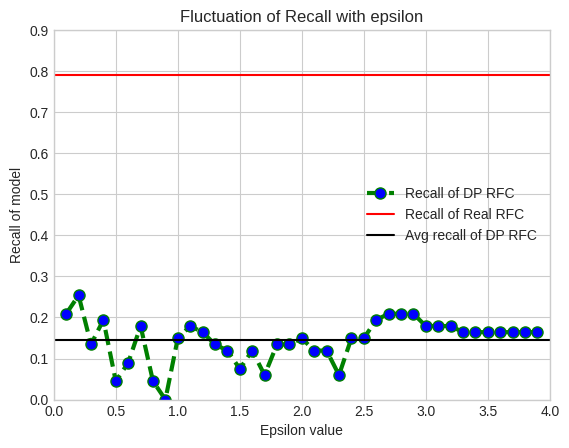

In [ ]:
x= np.arange(0.1,4.0, 0.1)
plt.plot(x, recall, color ='green',linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=8, label = 'Recall of DP RFC')
plt.style.use('seaborn-whitegrid')

plt.axhline(y=dprm_recall, color ='red', label= 'Recall of Real RFC')
plt.axhline(y =recall_mean, color ='black', label ='Avg recall of DP RFC')
plt.ylim(0, 0.9)
plt.xlim(0,4)
plt.xlabel('Epsilon value')
plt.ylabel('Recall of model')
plt.title('Fluctuation of Recall with epsilon')
plt.legend()
plt.show()

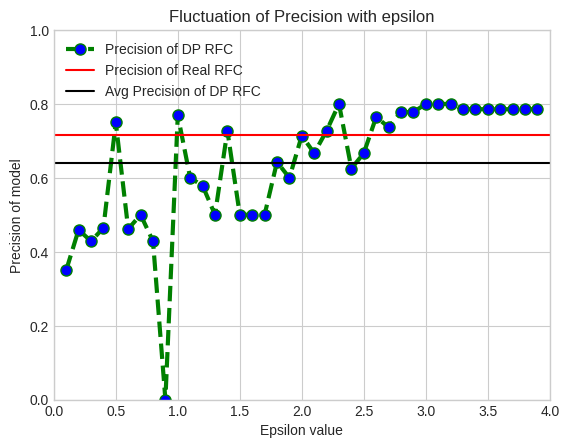

In [ ]:
x= np.arange(0.1,4.0, 0.1)
plt.plot(x, precision, color ='green',linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=8, label = 'Precision of DP RFC')
plt.style.use('seaborn-whitegrid')

plt.axhline(y=dprm_precision, color ='red', label= 'Precision of Real RFC')
plt.axhline(y =precision_mean, color ='black', label ='Avg Precision of DP RFC')
plt.ylim(0, 1)
plt.xlim(0,4)
plt.xlabel('Epsilon value')
plt.ylabel('Precision of model')
plt.title('Fluctuation of Precision with epsilon')
plt.legend()
plt.show()

In [ ]:
#plotting roc curve and  getting auc score
from sklearn.metrics import roc_curve,roc_auc_score
def plot_roc_curve(fpr,tpr, v=str()):
    plt.plot(fpr,tpr)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(v)
    plt.show()

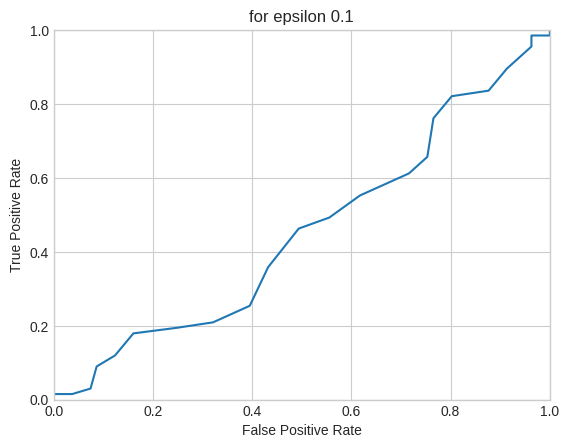

In [ ]:
fpr , tpr , thresholds = roc_curve ( y_test, pred_prob[0])
plot_roc_curve(fpr, tpr, "for epsilon 0.1")

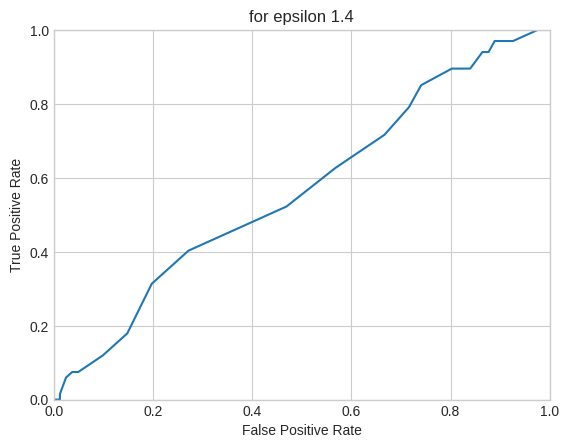

In [ ]:
fpr , tpr , thresholds = roc_curve ( y_test, pred_prob[15])
plot_roc_curve(fpr, tpr, "for epsilon 1.4")

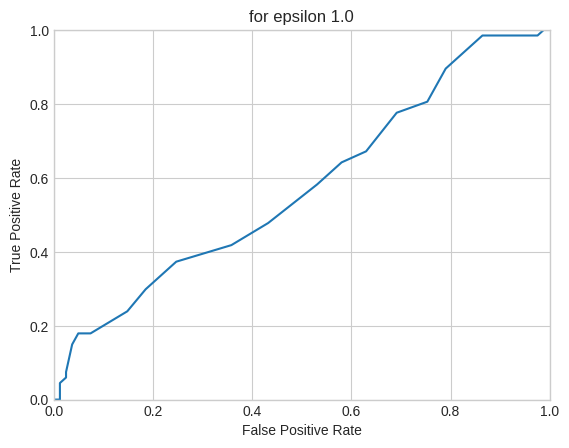

In [ ]:
fpr , tpr , thresholds = roc_curve ( y_test, pred_prob[9])
plot_roc_curve(fpr, tpr, "for epsilon 1.0")

In [ ]:
from sklearn import metrics
auc_dp= metrics.roc_auc_score(y_test, pred_prob[9] )
print('AUC score for private model,e =1.0, with private data =', auc_dp)

AUC score for private model,e =1.0, with private data = 0.5754560530679933


# Explainability - GAM (Generalized Additive Model)
GAM is a generalized linear model in which the linear response variable depends linearly on unknown smooth functions of some predictor variables, and interest focuses on inference about these smooth functions.

In [ ]:
!pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 6.5 MB/s eta 0:00:00


In [ ]:
from pygam import LinearGAM, s, f
from pygam import LogisticGAM

In [ ]:
#split data in train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
# Select the top 20 features from feature_importance_df
top_features = feature_importance_df['Feature'][:20]

#GAM Model
gam_model = LogisticGAM()
gam_model.fit(X_train[top_features], y_train)


LogisticGAM(callbacks=[Deviance(), Diffs(), Accuracy()], 
   fit_intercept=True, max_iter=100, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + intercept,
   tol=0.0001, verbose=False)

In [ ]:
# Get predictions from the model
predictions = gam_model.predict(X_test[top_features])

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7297297297297297
Precision: 0.6753246753246753
Recall: 0.7761194029850746
F1-score: 0.7222222222222222


In [ ]:
gam_model.summary()

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                     52.4976
Link Function:                        LogitLink Log Likelihood:                                  -237.9961
Number of Samples:                          592 AIC:                                              580.9874
                                                AICc:                                             591.8357
                                                UBRE:                                               3.0523
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4172
Feature Function                  Lam

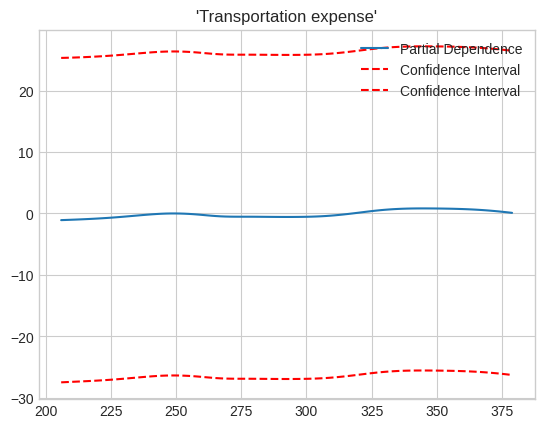

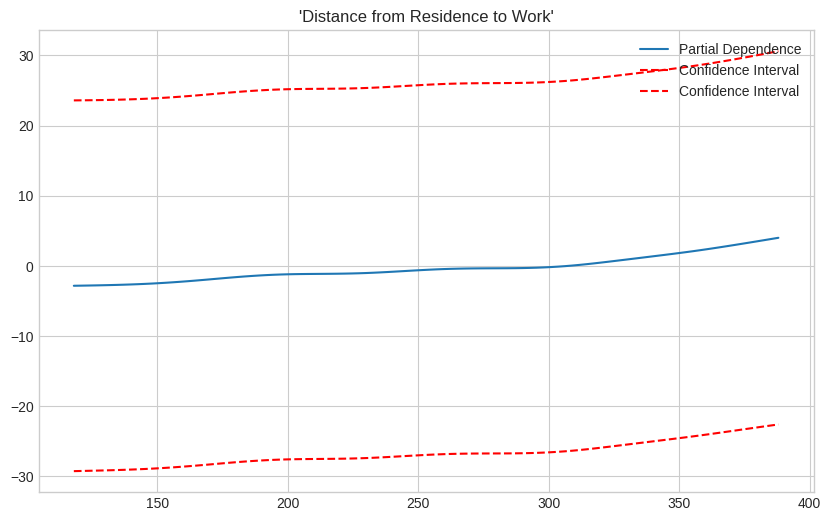

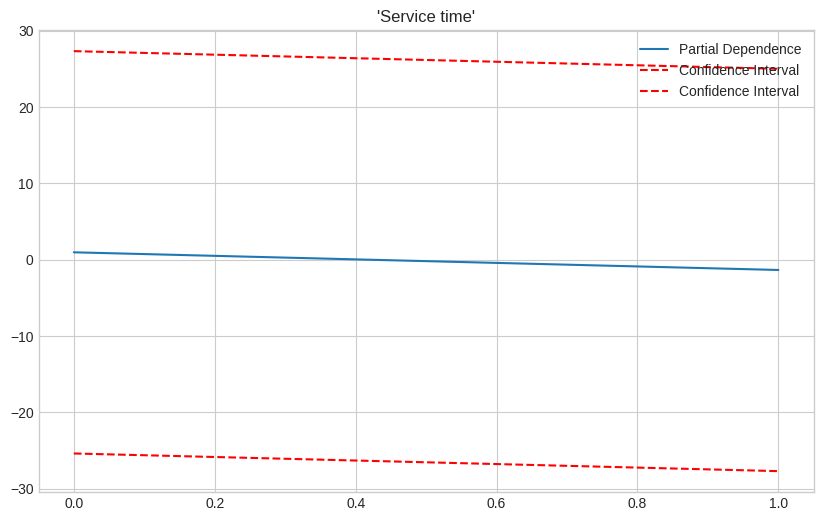

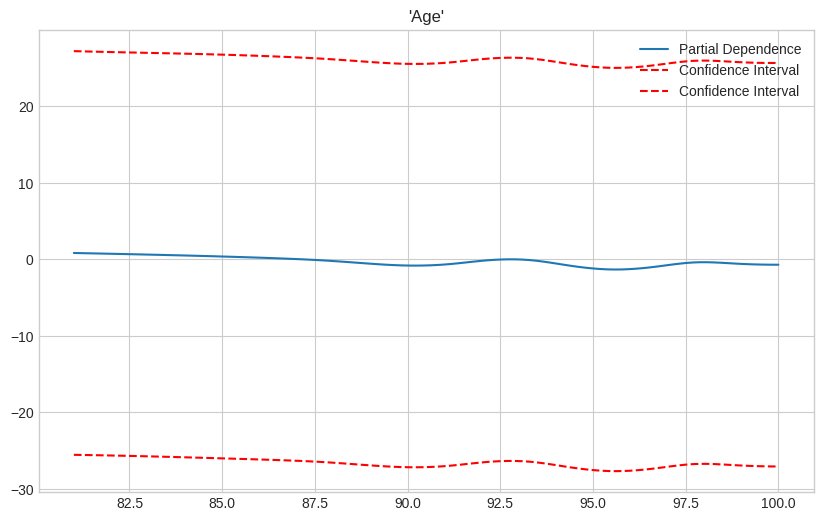

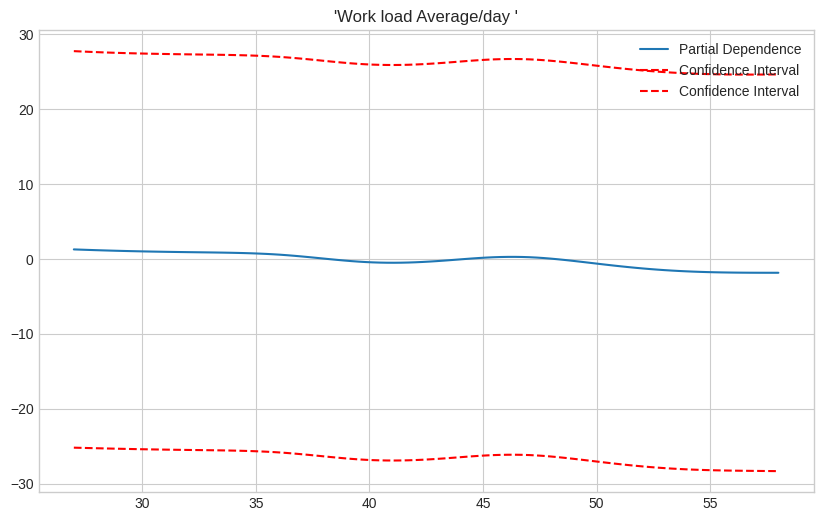

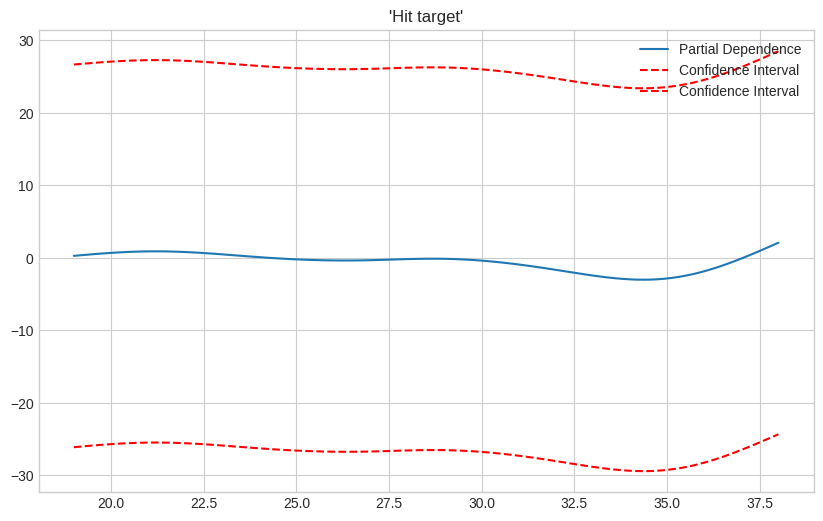

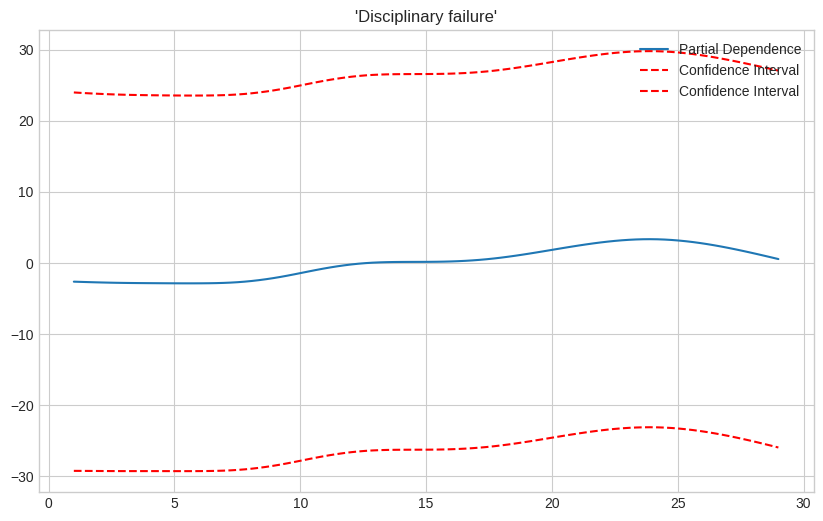

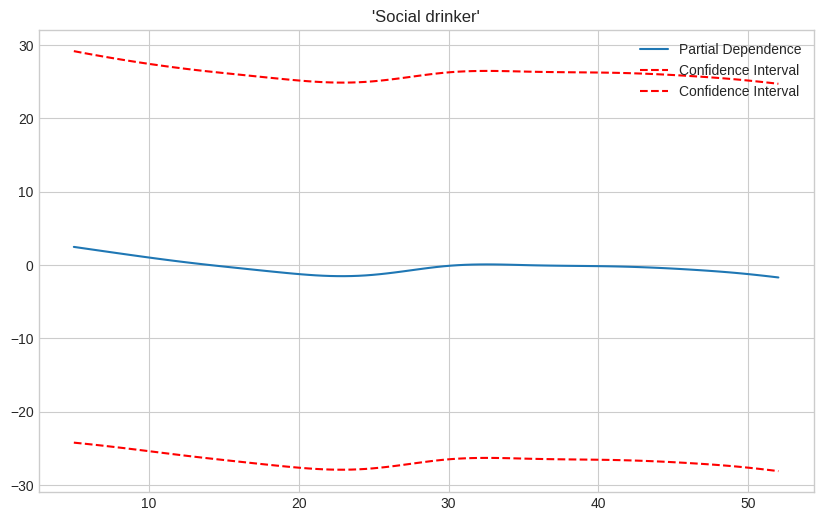

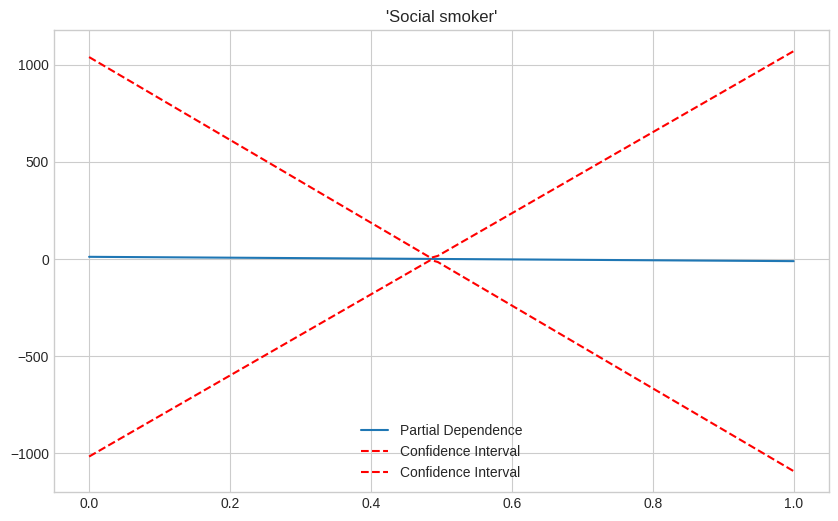

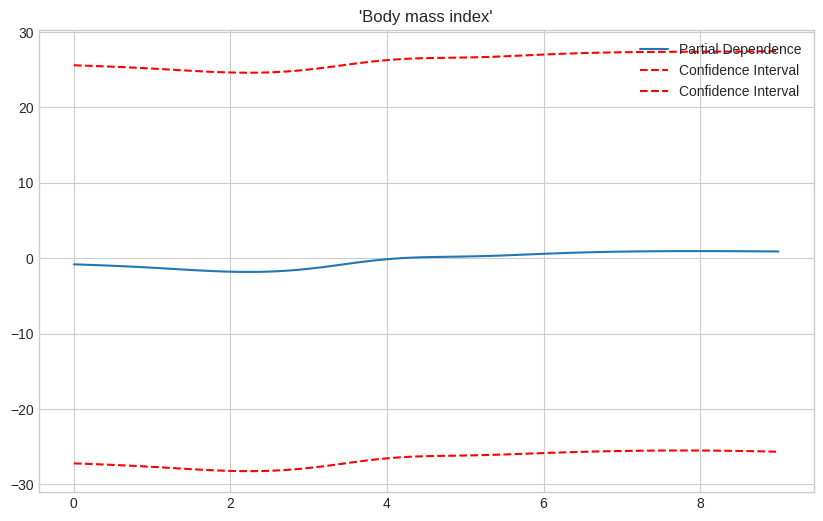

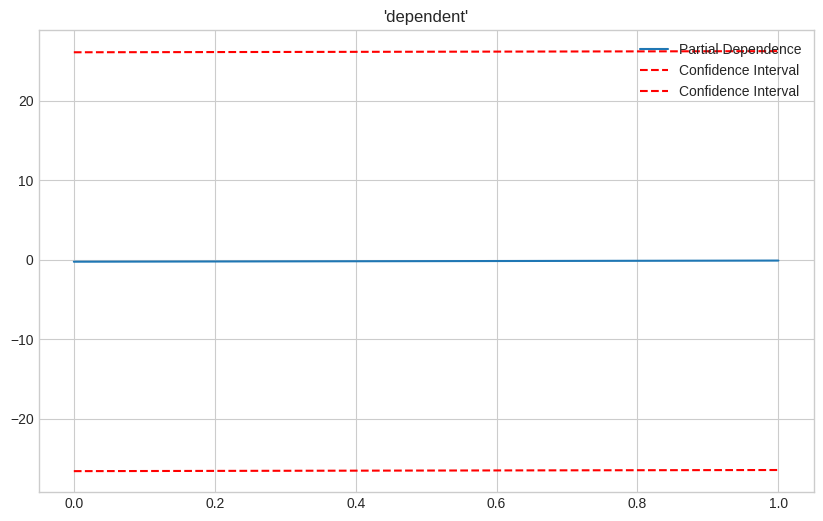

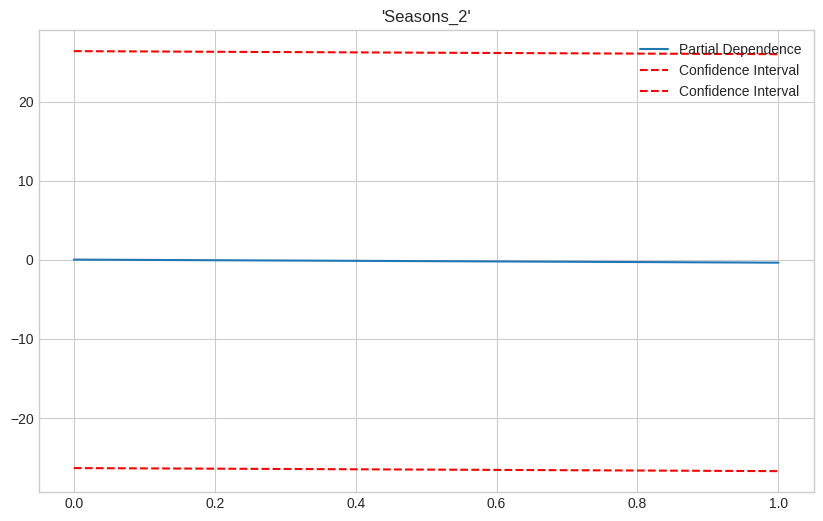

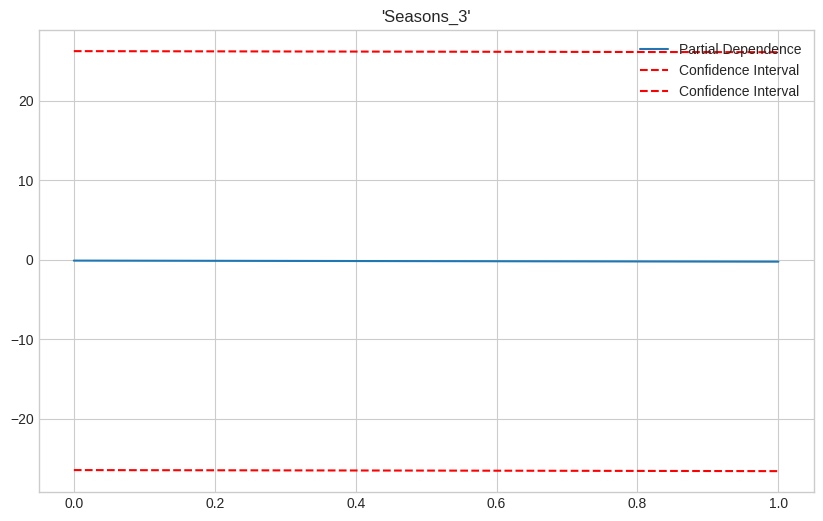

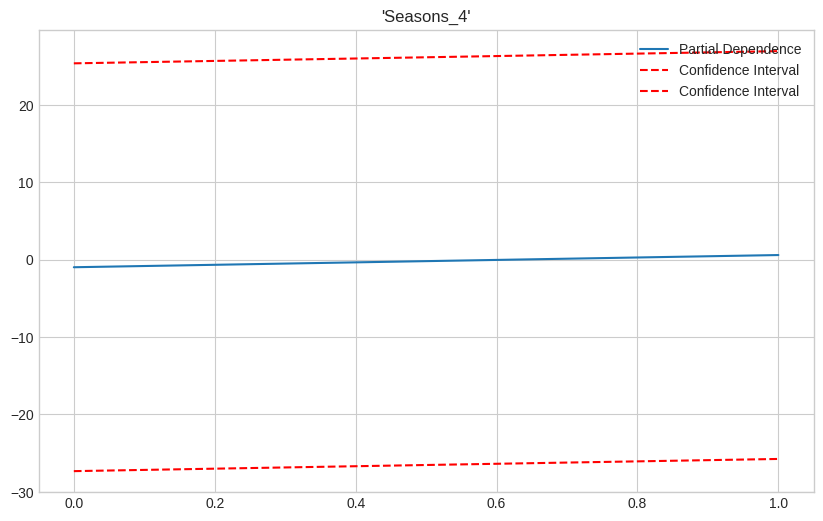

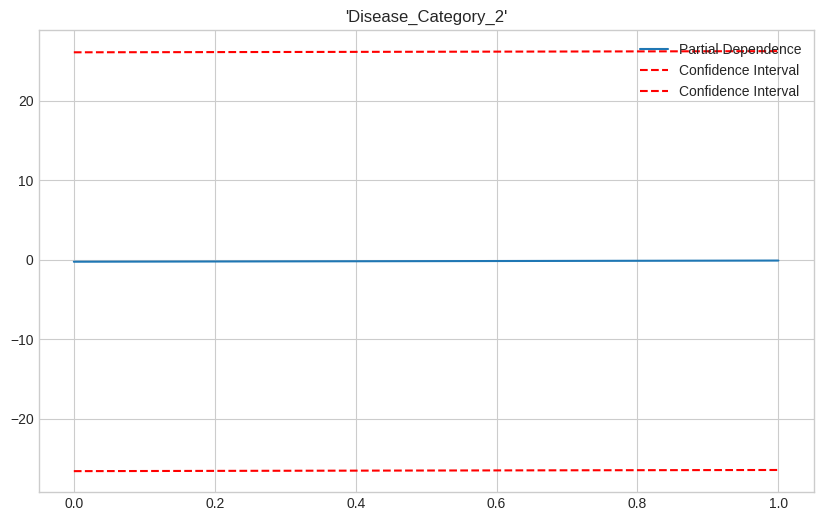

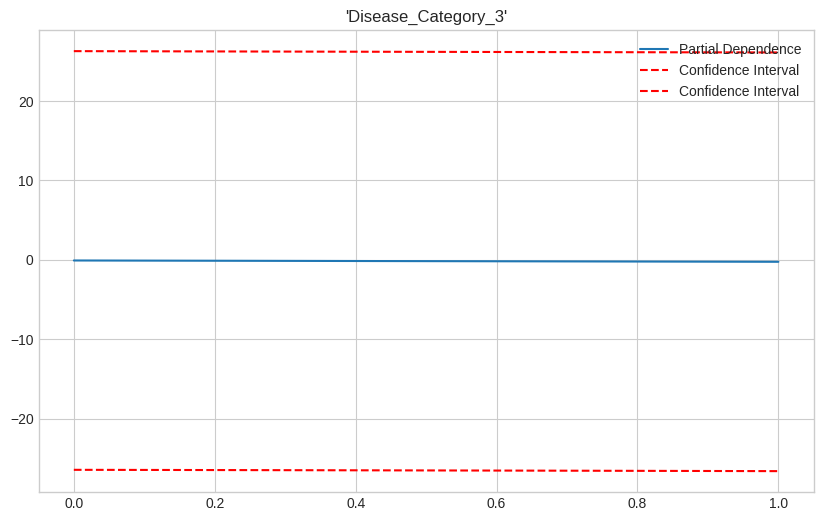

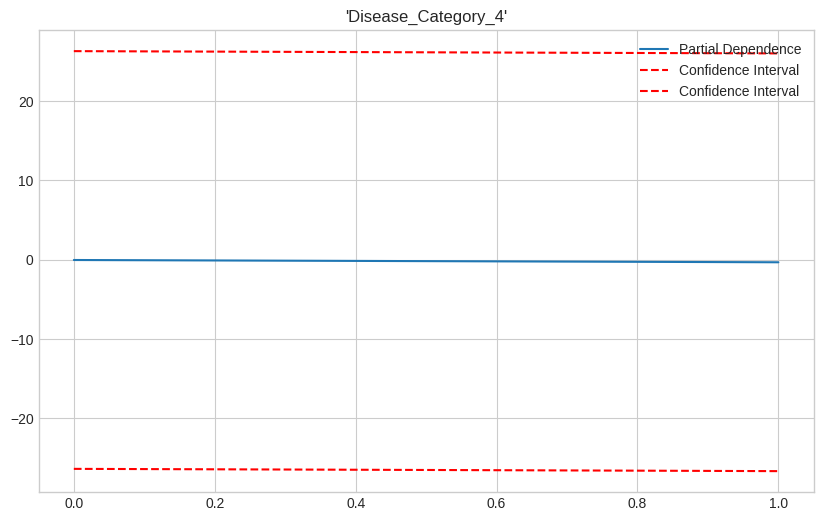

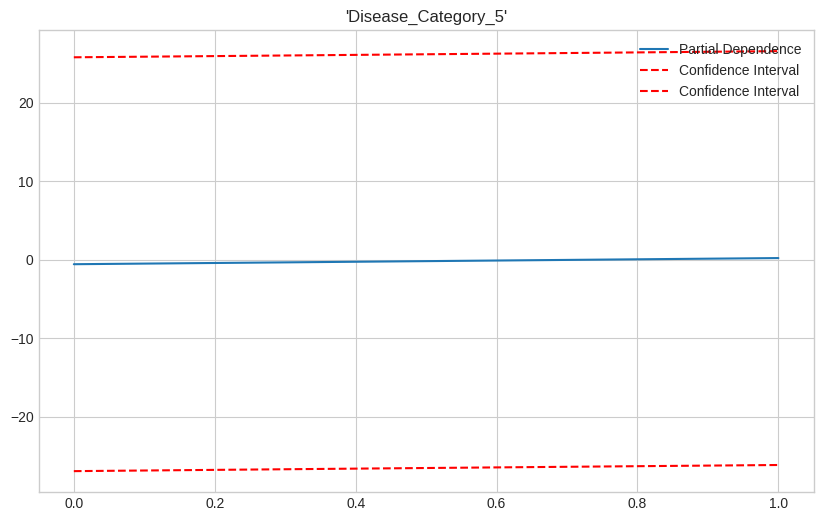

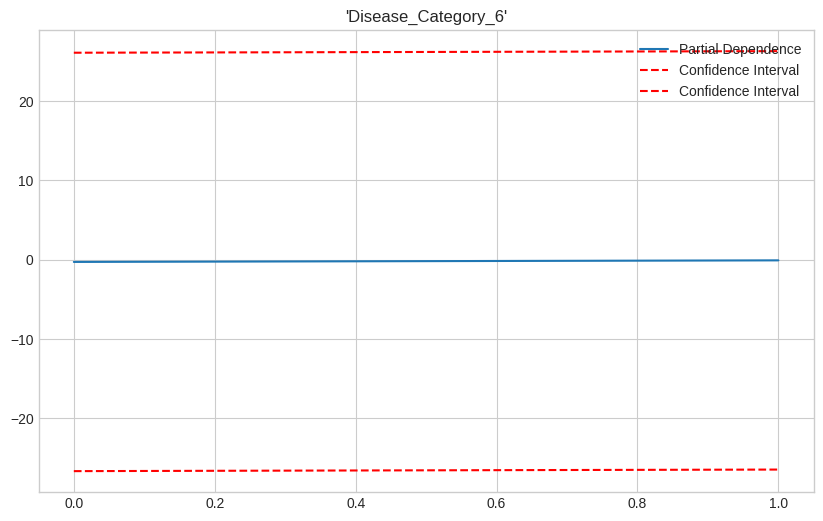

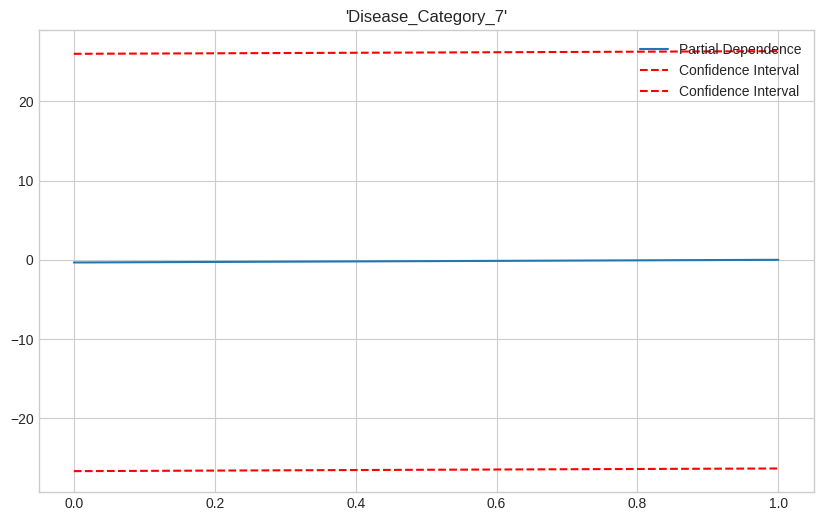

In [ ]:
import matplotlib.pyplot as plt

titles = X_train.columns.to_list()

for i, term in enumerate(gam_model.terms):
    if term.isintercept:
        continue
    XX = gam_model.generate_X_grid(term=i)
    pdep, confi = gam_model.partial_dependence(term=i, X=XX, width=0.95)
    plt.figure()
    plt.rcParams['figure.figsize'] = (10, 6)

    plt.plot(XX[:, term.feature], pdep, label='Partial Dependence')
    plt.plot(XX[:, term.feature], confi, c='r', ls='--', label='Confidence Interval')
    plt.title(repr(titles[i]))
    plt.legend()
    plt.show()

Counterfactual

In [ ]:
from ceml.sklearn import generate_counterfactual

ModuleNotFoundError: No module named 'ceml'

In [ ]:
x = X_test.iloc[2]
print("Prediction on x: {0}".format(rdrm_rf.predict([x])))

In [ ]:
y_test.iloc[2]

In [ ]:
print(generate_counterfactual(rdrm_rf, x.values, y_target=0, features_whitelist=None))

In [ ]:
# Compute counterfactual
print("\nCompute counterfactual ....")
print(generate_counterfactual(rdrm_rf, x.values, y_target=1, features_whitelist=None))

Counterfactual on DP data

In [ ]:
#Split data into train test
X_train_dp, X_test_dp,y_train_dp, y_test_dp = train_test_split(X_dp, y, test_size=0.2,random_state=42)

In [ ]:
x_dp = X_test_dp.iloc[2]
print("Prediction on x: {0}".format(dprm_rf.predict([x_dp])))

In [ ]:
y_test_dp.iloc[2]

In [ ]:
# Compute counterfactual
print("\nCompute counterfactual ....")
print(generate_counterfactual(dprm_rf, x_dp.values, y_target=0, features_whitelist=None))

# ACF (Additive Counterfactual Fairness)

Identifying Sensitive features

In [ ]:
X.columns

Index(['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Social drinker', 'Social smoker',
       'Body mass index', 'dependent', 'Seasons_2', 'Seasons_3', 'Seasons_4',
       'Disease_Category_2', 'Disease_Category_3', 'Disease_Category_4',
       'Disease_Category_5', 'Disease_Category_6', 'Disease_Category_7',
       'Disease_Category_8', 'GraduateOrHigher_1', 'Day of the week_3',
       'Day of the week_4', 'Day of the week_5', 'Day of the week_6',
       'Month of absence_1', 'Month of absence_2', 'Month of absence_3',
       'Month of absence_4', 'Month of absence_5', 'Month of absence_6',
       'Month of absence_7', 'Month of absence_8', 'Month of absence_9',
       'Month of absence_10', 'Month of absence_11', 'Month of absence_12'],
      dtype='object')

In [ ]:
sensitive_ft = ['Age', 'Body mass index']

In [ ]:
insensitive_ft = [item for item in X.columns if item not in sensitive_ft]
# insensitive_ft

In [ ]:
#Split data into train test
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
sens_train = X_train[sensitive_ft]
sens_test = X_test[sensitive_ft]

## Predicting each variable with sensitive variables

### 1. For Training Data

In [ ]:
insensitive_ft_cont = ['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Work load Average/day ', 'Hit target', 'dependent']

insensitive_ft_cate = [item for item in insensitive_ft if item not in insensitive_ft_cont]

<p align='center'>Xn = f(S1,S2....)<p>

In [ ]:
residual_df_cont_err = pd.DataFrame()
residual_df_cont_abs = pd.DataFrame()

for feature in insensitive_ft_cont:
    linreg_model = LinearRegression().fit(sens_train, X_train[feature])
    residual_df_cont_err[feature] = X_train[feature] - linreg_model.predict(sens_train)
    residual_df_cont_abs[feature] =np.abs(X_train[feature] - linreg_model.predict(sens_train))

In [ ]:
residual_df_cate_logloss = pd.DataFrame()
residual_df_cate_pearson = pd.DataFrame()

for feature in insensitive_ft_cate:
    logireg_model = LogisticRegression().fit(sens_train, X_train[feature])
    probabilities = logireg_model.predict_proba(sens_train)[:, 1]
    residual_df_cate_logloss[feature] = X_train[feature]*np.log(probabilities) - (1-X_train[feature])*np.log(1-probabilities)
    residual_df_cate_pearson[feature] = (X_train[feature] - probabilities) / np.sqrt(probabilities * (1 - probabilities))

<p align='center'>y = f(e1, e2, e3....)  # using logistic regression<p>

i. Simple Error + Log Loss

In [ ]:
residual_df1 = pd.concat([residual_df_cont_err, residual_df_cate_logloss], axis=1)
train_fair1 = LogisticRegression(random_state=0, solver='liblinear',
                              multi_class='ovr').fit(residual_df1, y_train)

ii. Absolute Error + Log Loss

In [ ]:
residual_df2 = pd.concat([residual_df_cont_abs, residual_df_cate_logloss], axis=1)
train_fair2 = LogisticRegression(random_state=0, solver='liblinear',
                              multi_class='ovr').fit(residual_df2, y_train)

iii. Simple Error + Pearson Correlation

In [ ]:
residual_df3 = pd.concat([residual_df_cont_err, residual_df_cate_pearson], axis=1)
train_fair3 = LogisticRegression(random_state=0, solver='liblinear',
                              multi_class='ovr').fit(residual_df3, y_train)

iv. Absolute Error + Pearson Correlation

In [ ]:
residual_df4 = pd.concat([residual_df_cont_abs, residual_df_cate_pearson], axis=1)
train_fair4 = LogisticRegression(random_state=0, solver='liblinear',
                              multi_class='ovr').fit(residual_df4, y_train)

### 2. Testing Data for testing fair model

In [ ]:
residual_df_cont_err_test = pd.DataFrame()
residual_df_cont_abs_test = pd.DataFrame()

for feature in insensitive_ft_cont:
    linreg_model = LinearRegression().fit(sens_test, X_test[feature])
    residual_df_cont_err_test[feature] = X_test[feature] - linreg_model.predict(sens_test)
    residual_df_cont_abs_test[feature] =np.abs(X_test[feature] - linreg_model.predict(sens_test))

In [ ]:
residual_df_cate_logloss_test = pd.DataFrame()
residual_df_cate_pearson_test = pd.DataFrame()

for feature in insensitive_ft_cate:
    logireg_model = LogisticRegression().fit(sens_test, X_test[feature])
    probabilities = logireg_model.predict_proba(sens_test)[:, 1]
    residual_df_cate_logloss_test[feature] = X_test[feature]*np.log(probabilities) - (1-X_test[feature])*np.log(1-probabilities)
    residual_df_cate_pearson_test[feature] = (X_test[feature] - probabilities) / np.sqrt(probabilities * (1 - probabilities))

i. Simple Error + Log Loss

In [ ]:
residual_df1_test = pd.concat([residual_df_cont_err_test, residual_df_cate_logloss_test], axis=1)
y_pred_fair1 = train_fair1.predict(residual_df1_test)

print("Accuracy of the fair model:", train_fair1.score(residual_df1_test, y_test))
# Generate classification report
report = classification_report(y_test, y_pred_fair1)

# Evaluate the ACF (fair) model
fair_accuracy = accuracy_score(y_test, y_pred_fair1)
fair_precision = precision_score(y_test, y_pred_fair1)
fair_recall = recall_score(y_test, y_pred_fair1)
fair_f1 = f1_score(y_test, y_pred_fair1)

print("Classification Report:")
print(report)

Accuracy of the fair model: 0.7094594594594594
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74        81
           1       0.69      0.66      0.67        67

    accuracy                           0.71       148
   macro avg       0.71      0.70      0.71       148
weighted avg       0.71      0.71      0.71       148



ii. Absolute Error + Log Loss

In [ ]:
residual_df2_test = pd.concat([residual_df_cont_abs_test, residual_df_cate_logloss_test], axis=1)
y_pred_fair2 = train_fair2.predict(residual_df2_test)

print("Accuracy of the fair model:", train_fair2.score(residual_df2_test, y_test))
# Generate classification report
report = classification_report(y_test, y_pred_fair2)

print("Classification Report:")
print(report)

Accuracy of the fair model: 0.668918918918919
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        81
           1       0.64      0.63      0.63        67

    accuracy                           0.67       148
   macro avg       0.67      0.67      0.67       148
weighted avg       0.67      0.67      0.67       148



iii. Simple Error + Pearson Residual

In [ ]:
residual_df3_test = pd.concat([residual_df_cont_err_test, residual_df_cate_pearson_test], axis=1)
y_pred_fair3 = train_fair3.predict(residual_df3_test)

print("Accuracy of the fair model:", train_fair3.score(residual_df3_test, y_test))
# Generate classification report
report = classification_report(y_test, y_pred_fair3)

print("Classification Report:")
print(report)

Accuracy of the fair model: 0.7027027027027027
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73        81
           1       0.68      0.64      0.66        67

    accuracy                           0.70       148
   macro avg       0.70      0.70      0.70       148
weighted avg       0.70      0.70      0.70       148



iv. Absolute Error + Pearson Correlation

In [ ]:
residual_df4_test = pd.concat([residual_df_cont_abs_test, residual_df_cate_pearson_test], axis=1)
y_pred_fair4 = train_fair4.predict(residual_df4_test)

print("Accuracy of the fair model:", train_fair4.score(residual_df4_test, y_test))
# Generate classification report
report = classification_report(y_test, y_pred_fair4)

print("Classification Report:")
print(report)

Accuracy of the fair model: 0.6756756756756757
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.73      0.71        81
           1       0.65      0.61      0.63        67

    accuracy                           0.68       148
   macro avg       0.67      0.67      0.67       148
weighted avg       0.67      0.68      0.67       148



### 1. For Training Data

In [ ]:
insensitive_ft_cont = ['Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Work load Average/day ', 'Hit target', 'dependent']

insensitive_ft_cate = [item for item in insensitive_ft if item not in insensitive_ft_cont]

<p align='center'>Xn = f(S1,S2....)<p>

In [ ]:
residual_df_cont_err = pd.DataFrame()
residual_df_cont_abs = pd.DataFrame()

for feature in insensitive_ft_cont:
    linreg_model = LinearRegression().fit(sens_train, X_train[feature])
    residual_df_cont_err[feature] = X_train[feature] - linreg_model.predict(sens_train)
    residual_df_cont_abs[feature] =np.abs(X_train[feature] - linreg_model.predict(sens_train))

In [ ]:
residual_df_cate_logloss = pd.DataFrame()
residual_df_cate_pearson = pd.DataFrame()

for feature in insensitive_ft_cate:
    logireg_model = LogisticRegression().fit(sens_train, X_train[feature])
    probabilities = logireg_model.predict_proba(sens_train)[:, 1]
    residual_df_cate_logloss[feature] = X_train[feature]*np.log(probabilities) - (1-X_train[feature])*np.log(1-probabilities)
    residual_df_cate_pearson[feature] = (X_train[feature] - probabilities) / np.sqrt(probabilities * (1 - probabilities))

<p align='center'>y = f(e1, e2, e3....)  # using Random Forest<p>

i. Simple Error + Log Loss

In [ ]:
rf_fair1 = RandomForestClassifier(n_estimators=100, random_state=42).fit(residual_df1, y_train)

ii. Absolute Error + Log Loss

In [ ]:
rf_fair2 = RandomForestClassifier(n_estimators=100, random_state=42).fit(residual_df2, y_train)

iii. Simple Error + Pearson Correlation

In [ ]:
rf_fair3 = RandomForestClassifier(n_estimators=100, random_state=42).fit(residual_df3, y_train)

iv. Absolute Error + Pearson Correlation

In [ ]:
rf_fair4 = RandomForestClassifier(n_estimators=100, random_state=42).fit(residual_df4, y_train)

### 2. Testing Data for testing fair model

i. Simple Error + Log Loss

In [ ]:
y_pred_rf_fair1 = rf_fair1.predict(residual_df1_test)

print("Accuracy of the fair model:", rf_fair1.score(residual_df1_test, y_test))
# Generate classification report
report = classification_report(y_test, y_pred_rf_fair1)

print("Classification Report:")
print(report)

Accuracy of the fair model: 0.6013513513513513
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.49      0.58        81
           1       0.54      0.73      0.62        67

    accuracy                           0.60       148
   macro avg       0.62      0.61      0.60       148
weighted avg       0.62      0.60      0.60       148



ii. Absolute Error + Log Loss

In [ ]:
y_pred_rf_fair2 = rf_fair2.predict(residual_df2_test)

print("Accuracy of the fair model:", rf_fair2.score(residual_df2_test, y_test))
# Generate classification report
report = classification_report(y_test, y_pred_rf_fair2)

print("Classification Report:")
print(report)

Accuracy of the fair model: 0.5878378378378378
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.40      0.51        81
           1       0.53      0.82      0.64        67

    accuracy                           0.59       148
   macro avg       0.63      0.61      0.58       148
weighted avg       0.64      0.59      0.57       148



iii. Simple Error + Pearson Residual

In [ ]:
y_pred_rf_fair3 = rf_fair3.predict(residual_df3_test)

print("Accuracy of the fair model:", rf_fair3.score(residual_df3_test, y_test))
# Generate classification report
report = classification_report(y_test, y_pred_rf_fair3)

print("Classification Report:")
print(report)

Accuracy of the fair model: 0.6621621621621622
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.57      0.65        81
           1       0.60      0.78      0.68        67

    accuracy                           0.66       148
   macro avg       0.68      0.67      0.66       148
weighted avg       0.68      0.66      0.66       148



iv. Absolute Error + Pearson Correlation

In [ ]:
y_pred_rf_fair4 = rf_fair4.predict(residual_df4_test)

print("Accuracy of the fair model:", rf_fair4.score(residual_df4_test, y_test))
# Generate classification report
report = classification_report(y_test, y_pred_rf_fair4)

print("Classification Report:")
print(report)

Accuracy of the fair model: 0.5540540540540541
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.41      0.50        81
           1       0.51      0.73      0.60        67

    accuracy                           0.55       148
   macro avg       0.58      0.57      0.55       148
weighted avg       0.58      0.55      0.54       148



## Conclusion:

If we use logistic regression for error modeling and use simple errors in linear regression for sensitive continuous data and log loss errors in logistic regression for sensitive discrete data, we get optimal results.



```
"Accuracy: 0.71
Precision: 0.71
Recall: 0.70
F1: 0.71"
```



### Comparing with baseline model

In [ ]:
# Create a DataFrame to compare the evaluation metrics
metrics_df = pd.DataFrame({
    'Model': ['Baseline', 'ACF (Fair)'],
    'Accuracy': [rdrm_accuracy, fair_accuracy],
    'Precision': [rdrm_precision, fair_precision],
    'Recall': [rdrm_recall, fair_recall],
    'F1 Score': [rdrm_f1, fair_f1]
})

metrics_df.head()

,Model,Accuracy,Precision,Recall,F1 Score
0,Baseline,0.756757,0.701299,0.805970,0.750000
1,ACF (Fair),0.709459,0.687500,0.656716,0.671756


## Model Fairness Metrics

In [ ]:
X_train_dp, X_test_dp,y_train_dp, y_test_dp=train_test_split(X_dp, y, test_size=0.2,random_state=42)

In [ ]:
X_test_dp.head()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Social drinker,Social smoker,Body mass index,...,Month of absence_3,Month of absence_4,Month of absence_5,Month of absence_6,Month of absence_7,Month of absence_8,Month of absence_9,Month of absence_10,Month of absence_11,Month of absence_12
120,225,26,9,28,308.593,95,0,0,0,25,...,0,0,0,0,0,0,0,0,0,0
416,248,25,14,50,239.409,98,0,0,0,32,...,0,1,0,0,0,0,0,0,0,0
334,260,50,11,35,284.031,97,0,1,0,23,...,0,0,0,0,0,0,0,0,1,0
350,235,11,14,35,236.629,93,0,0,0,28,...,0,0,0,0,0,0,0,0,0,1
412,179,51,18,35,239.409,98,0,1,0,32,...,0,1,0,0,0,0,0,0,0,0


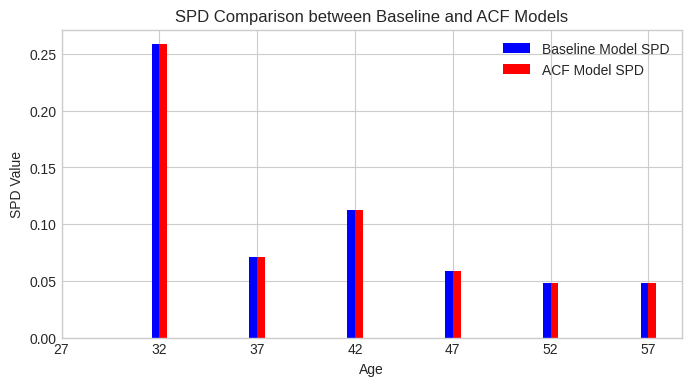

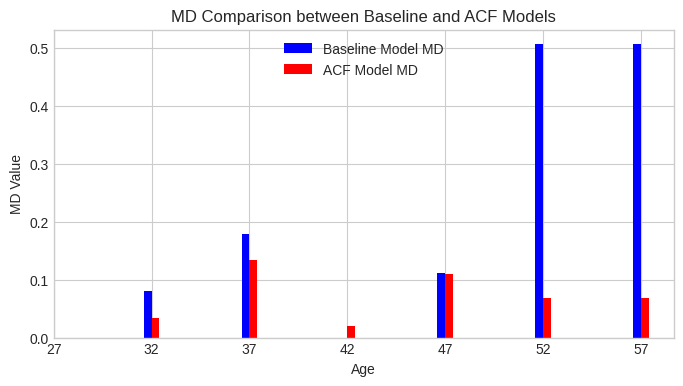

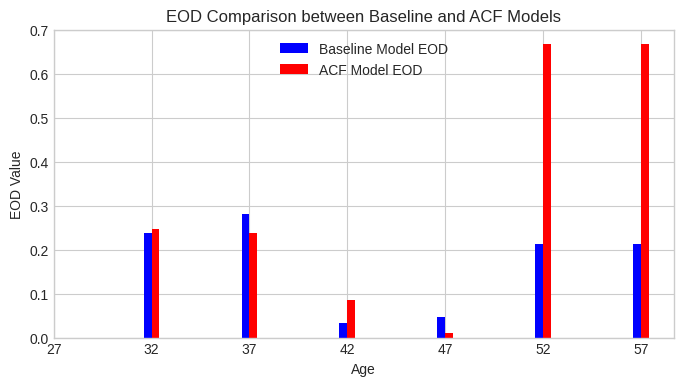

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define thresholds for age groups
thresholds = np.arange(X_test['Age'].min(), X_test['Age'].max(), 5)

# For baseline model
age_baseline = X_test['Age']  # Age data from your DataFrame
predictions_baseline = y_pred  # Predictions from your baseline model

# Calculate fairness metrics for baseline model
spd_values_baseline = []
md_values_baseline = []
eod_values_baseline = []

for threshold in thresholds:
    group1_indices = np.where(age_baseline < threshold)[0].tolist()  # Convert indices to list
    group2_indices = np.where(age_baseline >= threshold)[0].tolist()  # Convert indices to list

    group1_predictions = predictions_baseline[group1_indices]
    group2_predictions = predictions_baseline[group2_indices]

    group1_labels = y_test_dp.iloc[group1_indices]  # Extract labels for group 1 using iloc
    group2_labels = y_test_dp.iloc[group2_indices]  # Extract labels for group 2 using iloc

    # Calculate fairness metrics
    spd = np.abs(np.mean(group1_labels) - np.mean(group2_labels))
    md = np.abs(np.mean(group1_predictions) - np.mean(group2_predictions))
    eod = np.abs(np.sum(group1_labels & (predictions_baseline[group1_indices] > 0.5))/np.sum(group1_labels) - np.sum(group2_labels & (predictions_baseline[group2_indices] > 0.5))/np.sum(group2_labels))

    spd_values_baseline.append(spd)
    md_values_baseline.append(md)
    eod_values_baseline.append(eod)

# For ACF model
predictions_acf = y_pred_fair1  # Predictions from your ACF model

# Calculate fairness metrics for ACF model
spd_values_acf = []
md_values_acf = []
eod_values_acf = []

for threshold in thresholds:
    group1_indices = np.where(age_baseline < threshold)[0].tolist()  # Convert indices to list
    group2_indices = np.where(age_baseline >= threshold)[0].tolist()  # Convert indices to list

    group1_predictions = predictions_acf[group1_indices]
    group2_predictions = predictions_acf[group2_indices]

    group1_labels = y_test.iloc[group1_indices]  # Extract labels for group 1 using iloc
    group2_labels = y_test.iloc[group2_indices]  # Extract labels for group 2 using iloc

    # Calculate fairness metrics
    spd = np.abs(np.mean(group1_labels) - np.mean(group2_labels))
    md = np.abs(np.mean(group1_predictions) - np.mean(group2_predictions))
    eod = np.abs(np.sum(group1_labels & (predictions_acf[group1_indices] > 0.5))/np.sum(group1_labels) - np.sum(group2_labels & (predictions_acf[group2_indices] > 0.5))/np.sum(group2_labels))

    spd_values_acf.append(spd)
    md_values_acf.append(md)
    eod_values_acf.append(eod)

# Plotting SPD for both models
plt.figure(figsize=(8, 4))
plt.bar(thresholds - 0.2, spd_values_baseline, width=0.4, label='Baseline Model SPD', color='b', align='center')
plt.bar(thresholds + 0.2, spd_values_acf, width=0.4, label='ACF Model SPD', color='r', align='center')

plt.xlabel('Age')
plt.ylabel('SPD Value')
plt.title('SPD Comparison between Baseline and ACF Models')
plt.legend()
plt.xticks(thresholds)
plt.show()

# Plotting MD for both models
plt.figure(figsize=(8, 4))
plt.bar(thresholds - 0.2, md_values_baseline, width=0.4, label='Baseline Model MD', color='b', align='center')
plt.bar(thresholds + 0.2, md_values_acf, width=0.4, label='ACF Model MD', color='r', align='center')

plt.xlabel('Age')
plt.ylabel('MD Value')
plt.title('MD Comparison between Baseline and ACF Models')
plt.legend()
plt.xticks(thresholds)
plt.show()

# Plotting EOD for both models
plt.figure(figsize=(8, 4))
plt.bar(thresholds - 0.2, eod_values_baseline, width=0.4, label='Baseline Model EOD', color='b', align='center')
plt.bar(thresholds + 0.2, eod_values_acf, width=0.4, label='ACF Model EOD', color='r', align='center')

plt.xlabel('Age')
plt.ylabel('EOD Value')
plt.title('EOD Comparison between Baseline and ACF Models')
plt.legend()
plt.xticks(thresholds)
plt.show()
